## RSA Encryptation Analysis

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import iqr

In [37]:
df = pd.read_csv('RSA_Stats.csv')
df.columns = ['Algorithm', 'Size', 'Iteration', 'Encyptation', 'Decryptation']
df

,Algorithm,Size,Iteration,Encyptation,Decryptation
0,RSA,2,1,351.900002,583.400019
1,RSA,2,2,48.600021,265.999930
2,RSA,2,3,43.400098,319.299987
3,RSA,2,4,41.299965,256.300089
4,RSA,2,5,42.599975,296.499929
...,...,...,...,...,...
699995,RSA,128,96,40.999963,211.799983
699996,RSA,128,97,40.299958,213.699997
699997,RSA,128,98,40.200073,226.999982
699998,RSA,128,99,40.199957,210.899976


In [38]:
all_dfs = [] 
# list[0] = 2bytes, list[1] = 4bytes, list[2] = 8bytes, list[3] = 16bytes, list[4] = 32bytes, list[5] = 64bytes, list[6] = 128bytes

for size in df['Size'].unique():
    df_size = df[df['Size'] == size]    
    all_dfs.append(df_size)

print(len(all_dfs))
print(len(df['Size'].unique()))

7
7


C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


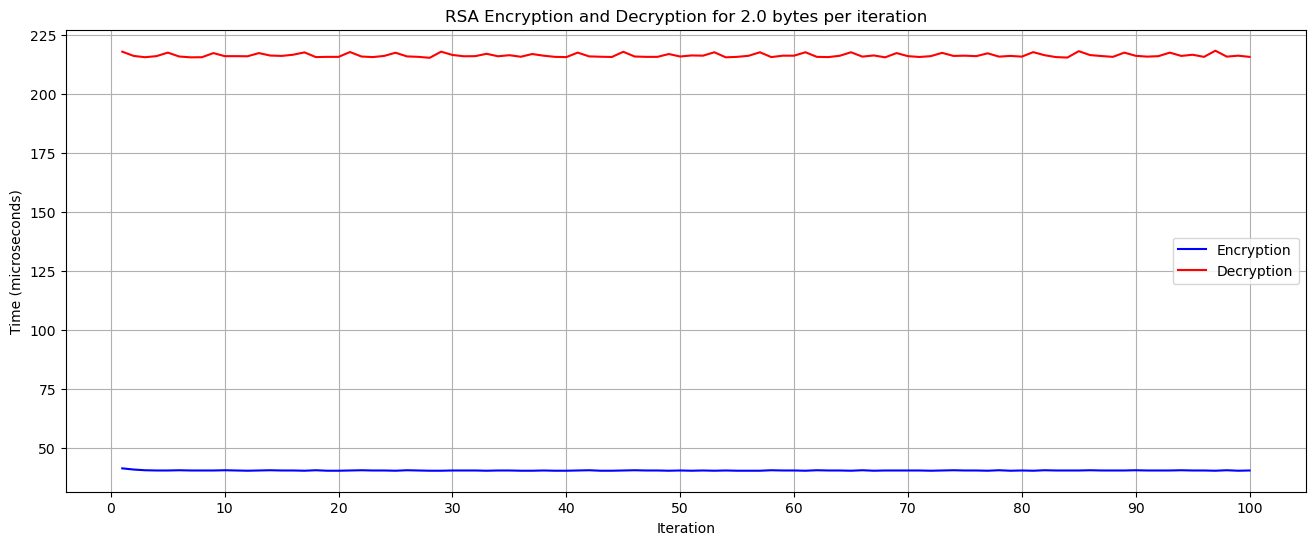

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


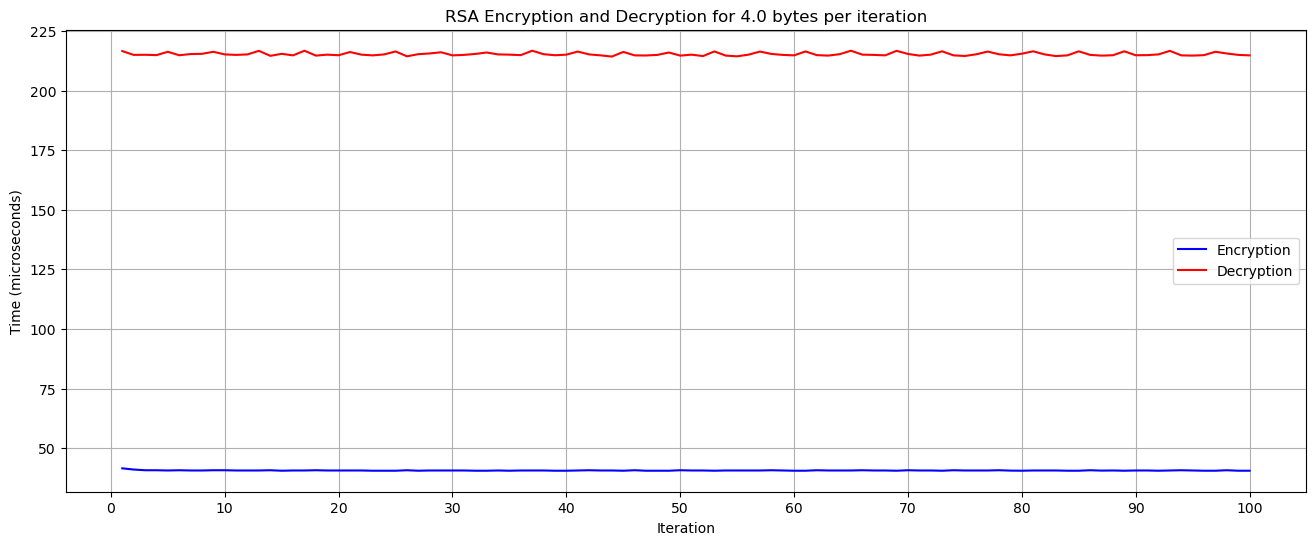

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


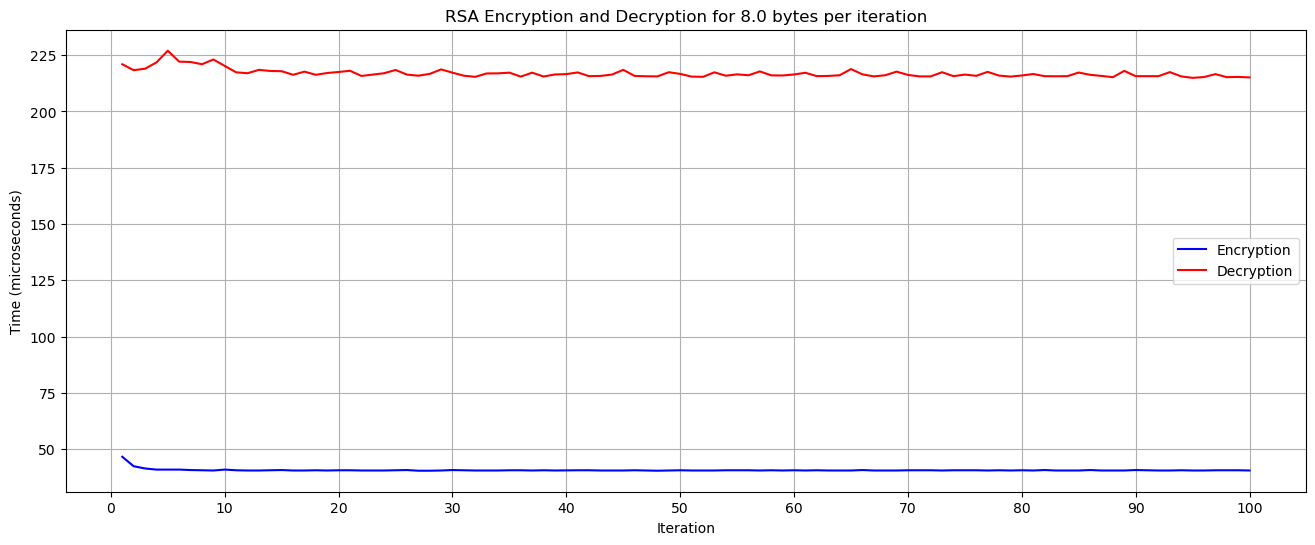

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


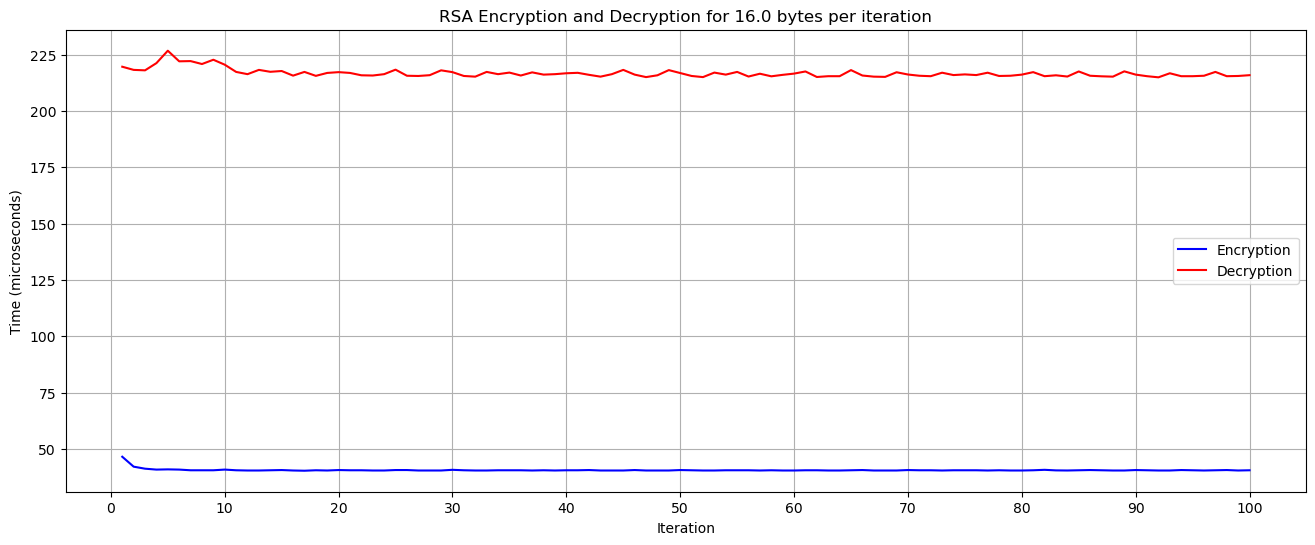

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


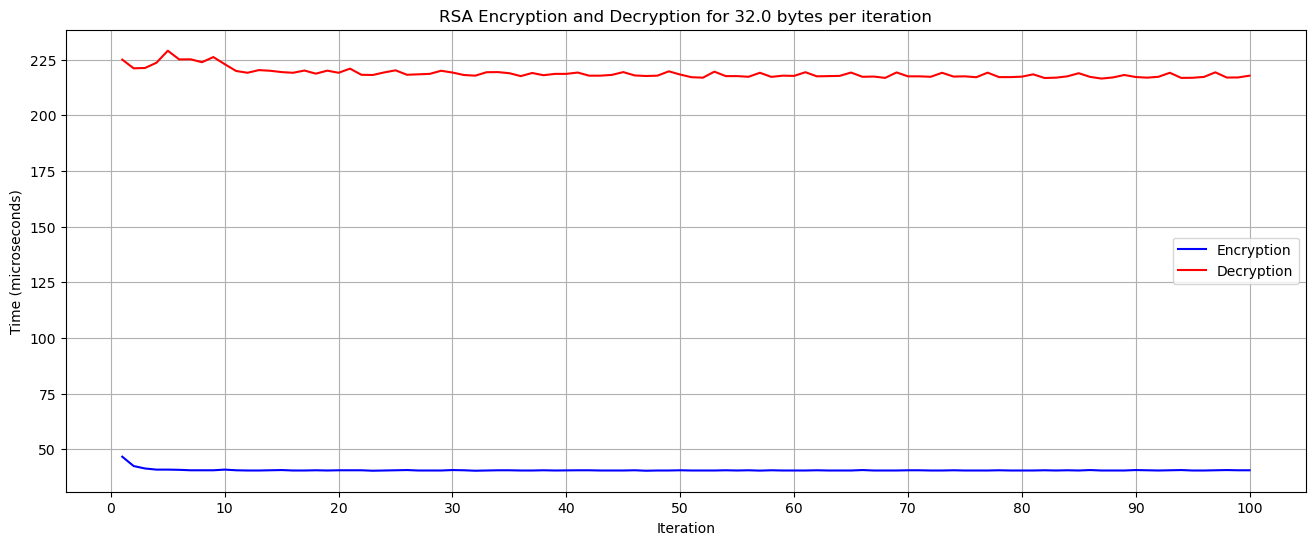

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


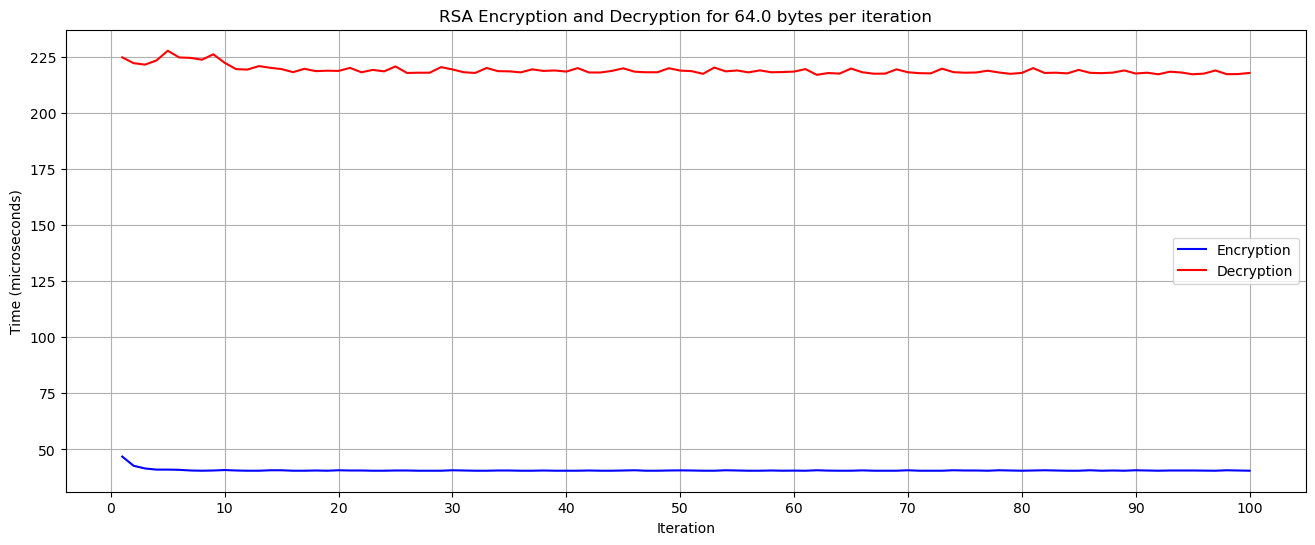

C:\Users\diogo\AppData\Local\Temp\ipykernel_23120\2606855911.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Iteration').median()


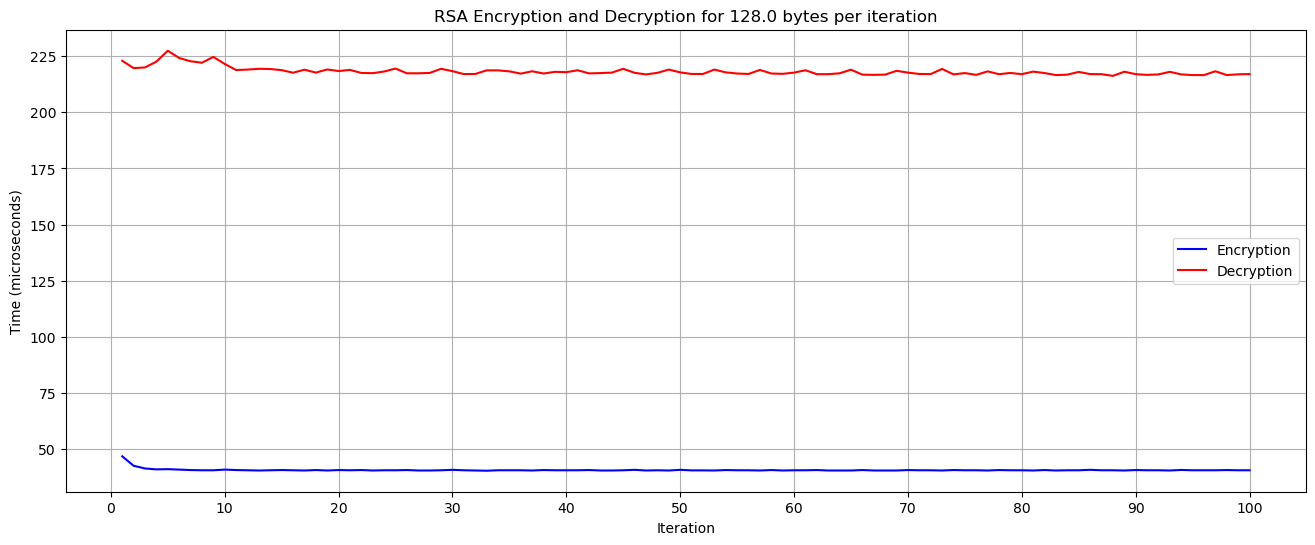

In [59]:
for data in all_dfs:
    # Agrupa por 'Iteration' e calcula a média
    data = data.groupby('Iteration').median()
    data = data.reset_index()
    
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=data, x='Iteration', y='Encyptation', label='Encryption', color='blue')
    sns.lineplot(data=data, x='Iteration', y='Decryptation', label='Decryption', color='red')
    plt.title(f"RSA Encryption and Decryption for {data['Size'][0]} bytes per iteration")
    plt.xlabel('Iteration')
    plt.ylabel('Time (microseconds)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(0, data['Iteration'].max() + 1, 10))  # Increase x-axis scale granularity
    plt.show()

In [40]:
def show_boxplot(title, info):
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=info)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Time (microseconds)')
    plt.show()

In [41]:
def show_histogram(title, data):
    
    bin_width = 2 * iqr(data) / (len(data) ** (1/3))
    
    if bin_width == 0:
        bin_width = 1

    b = int((data.max() - data.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=b, kde=True, color='skyblue')
    plt.title(title)
    plt.xlabel('Encrypt Time')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

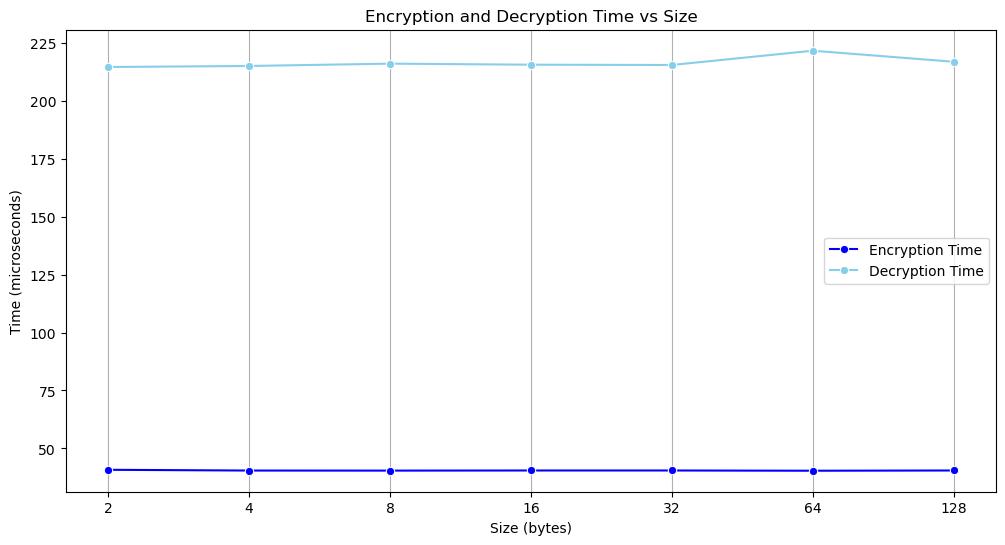

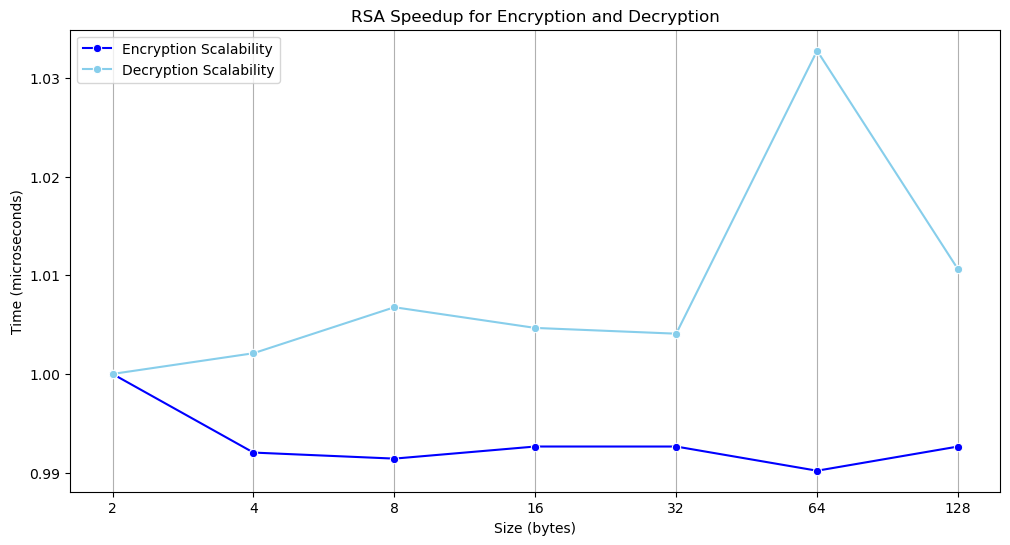

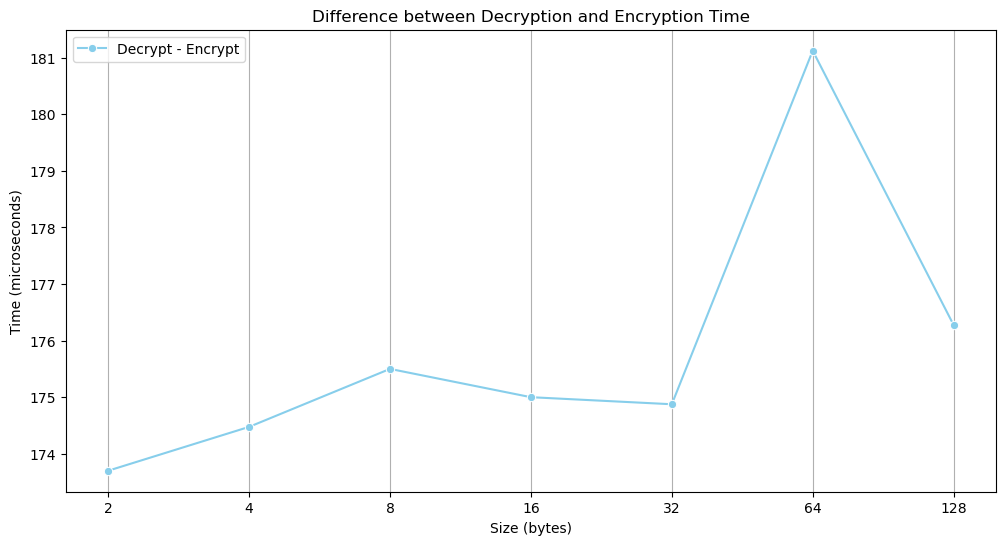

In [ ]:
time_per_size_data = pd.DataFrame(columns=['Size', 'Median_Encyptation', 'Median_Decryptation'])
df_escabiliade = pd.DataFrame(columns=['File', 'Encyptation', 'Decryptation'])
df_difrenca = pd.DataFrame(columns=['File', 'Difference'])

median_encryption_2bytes = 1
median_decryption_2bytes = 1


for k in range(1, len(all_dfs) + 1):
    data = all_dfs[k - 1]
    data = data[data['Iteration'] > 10]
    data.reset_index(drop=True, inplace=True)

    df_files_size = pd.DataFrame(columns=['File', 'Median_Encyptation', 'Median_Decryptation'])
    
    for i in range(1, 101):        
        file_data = data.iloc[(i - 1) * 90:i * 90]  # Select rows in chunks of 90

        new_row = {
            'File': f'File {i}',
            'Median_Encyptation': file_data['Encyptation'].median(),
            'Median_Decryptation': file_data['Decryptation'].median()
        }
        df_files_size = pd.concat([df_files_size, pd.DataFrame([new_row])], ignore_index=True)

    '''
    show_histogram(f"Histogram of Encryption Time for {2**k} bytes", df_files_size['Median_Encyptation'])
    show_boxplot(f"Boxplot of Encryption Time for {2**k} bytes", df_files_size['Median_Encyptation'])
    show_histogram(f"Histogram of Decryption Time for {2**k} bytes", df_files_size['Median_Decryptation'])
    show_boxplot(f"Boxplot of Decryption Time for {2**k} bytes", df_files_size['Median_Decryptation'])
    ''' 

    median_encryption = df_files_size['Median_Encyptation'].median()
    median_decryption = df_files_size['Median_Decryptation'].median()
    time_per_size_data = pd.concat([time_per_size_data, pd.DataFrame([[2**k, median_encryption, median_decryption]], columns=['Size', 'Median_Encyptation', 'Median_Decryptation'])], ignore_index=True)

    if k == 1:
        median_encryption_2bytes = median_encryption
        median_decryption_2bytes = median_decryption

    escalabilidade_encryption = median_encryption / median_encryption_2bytes
    escalabilidade_decryption = median_decryption / median_decryption_2bytes
    df_escabiliade = pd.concat([df_escabiliade, pd.DataFrame([[2**k, escalabilidade_encryption, escalabilidade_decryption]], columns=['File', 'Encyptation', 'Decryptation'])], ignore_index=True)

    diferenca = median_decryption - median_encryption
    df_difrenca = pd.concat([df_difrenca, pd.DataFrame([[2**k, diferenca]], columns=['File', 'Difference'])], ignore_index=True)


'''
ESTE GRAFICO RELACIONA O TEMPO DE ENCRIPTACAO E DESENCRIPTACAO COM O TAMANHO DO ARQUIVO
O EIXO DOS X TEM ESCALA LOGARITMICA DE BASE 2 PARA FACILITAR A VISUALIZACAO
O EIXO DOS Y TEM ESCALA LINEAR, MAS O VALOR DO TEMPO DE ENCRIPTACAO E DESENCRIPTACAO ESTAO EM MICROSEGUNDOS
'''

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_per_size_data['Size'], y=time_per_size_data['Median_Encyptation'], label='Encryption Time', color='blue', marker='o')
sns.lineplot(x=time_per_size_data['Size'], y=time_per_size_data['Median_Decryptation'], label='Decryption Time', color='skyblue', marker='o')
plt.title('Encryption and Decryption Time vs Size')
plt.xlabel('Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.xscale('log', base=2)
plt.xticks(ticks=[2**i for i in range(1, 8)], labels=[f"{2**i}" for i in range(1, 8)])
plt.grid(True, axis='x')
plt.show()


'''
ESTE GRAFICO VERIFICA O SPEEDUP DO ALGORITMO DE RSA PARA ENCRIPTACAO E DESENCRIPTACAO
ISTO OBTEM SE AO DIVIDIR O TEMPO DE ENCRIPTACAO E DESENCRIPTACAO DO TAMANHO ATUAL PELO TEMPO DE ENCRIPTACAO E DESENCRIPTACAO DO MENOR TAMANHO (2 BYTES).
ISSO PREMITIRA VERIFICAR SE O ALGORITMO TEM ESCALABILIDADE, OU SEJA, SE O TEMPO DE ENCRIPTACAO E DESENCRIPTACAO AUMENTA NA MESMA PROPORCAO QUE O TAMANHO DO ARQUIVO.
O EIXO DOS X TEM ESCALA LOGARITMICA DE BASE 2 PARA FACILITAR A VISUALIZACAO
O EIXO DOS Y TEM ESCALA LINEAR, MAS O VALOR DO TEMPO DE ENCRIPTACAO E DESENCRIPTACAO ESTAO EM MICROSEGUNDOS

'''


plt.figure(figsize=(12, 6))
sns.lineplot(x=time_per_size_data['Size'], y=df_escabiliade['Encyptation'], label='Encryption Scalability', color='blue', marker='o')
sns.lineplot(x=time_per_size_data['Size'], y=df_escabiliade['Decryptation'], label='Decryption Scalability', color='skyblue', marker='o')
plt.title('RSA Speedup for Encryption and Decryption')
plt.xlabel('Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.xscale('log', base=2)
plt.xticks(ticks=[2**i for i in range(1, 8)], labels=[f"{2**i}" for i in range(1, 8)])
plt.grid(True, axis='x')
plt.show()

'''
ESTE GRAFICO MOSTRA A DIFERENCA ENTRE O TEMPO DE DENSENCRIPTACAO E O TEMPO DE ENCRIPTACAO 
ISTO PERMITE VERIFICAR SE A DIFERENCA ENTRE OS DOIS TEMPOS AUMENTA QUANDO O TAMANHO DO ARQUIVO AUMENTA
O EIXO DOS X TEM ESCALA LOGARITMICA DE BASE 2 PARA FACILITAR A VISUALIZACAO
O EIXO DOS Y TEM ESCALA LINEAR, MAS O VALOR DO TEMPO DE ENCRIPTACAO E DESENCRIPTACAO ESTAO EM MICROSEGUNDOS
'''

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_difrenca['File'], y=df_difrenca['Difference'], label='Decrypt - Encrypt', color='skyblue', marker='o')
plt.title('Difference between Decryption and Encryption Time')
plt.xlabel('Size (bytes)')
plt.ylabel('Time (microseconds)')
plt.legend()
plt.xscale('log', base=2)
plt.xticks(ticks=[2**i for i in range(1, 8)], labels=[f"{2**i}" for i in range(1, 8)])
plt.grid(True, axis='x')
plt.show()
